# Setup

In [1]:
import sys
sys.path.append('/home/arnisaf/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [27]:
# load baselines: filename!!
with open('results/cifarstyle_baselines_freeze_True_pool_True_default_setup.json', 'r') as f:
    baselines = json.load(f)
baselines = baselines[1:]

# load results; filename
with open('results/cifarstyle_results_freeze_True_reinit_False_pool_True_reinitfalse.json', 'r') as f:
    results = json.load(f)

# Run this if the first element of the results is the PARAMS dict
params = results[0]
results = results[1:]
# if not, initialize a params dict -see 3. Init params

data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.733333,0.791333
1,0.001,0.001,-1,1,0.866667,0.768556
2,0.001,0.001,-1,2,0.800000,0.759833
3,0.001,0.001,-1,3,0.666667,0.789111
4,0.001,0.001,-1,4,0.866667,0.729444


In [3]:
# Filter the baselines to these percentages: 0.001, 0.01, 0.1, 0.5, 1.0
# because there are some extra percentages
baselines = [result for result in baselines if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]

results = [result for result in results if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]
data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.866667,0.810000
1,0.001,0.001,-1,1,0.933333,0.789000
2,0.001,0.001,-1,2,0.933333,0.808000
3,0.001,0.001,-1,3,0.866667,0.813000
4,0.001,0.001,-1,4,0.933333,0.807333


In [13]:
df_empirical = df.copy()

In [28]:
df_other = df.copy()

In [ ]:
# OR LOAD ARI Scores
with open("results/ari_scores/ari_scores_finetuned.json", "r") as f:
    ari_scores_all = json.load(f)
df_ari = pd.DataFrame(ari_scores_all)

# Display the DataFrame (showing the first few rows for brevity)
df_ari.head()

In [33]:
df_other

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.733333,0.791333
1,0.001,0.001,-1,1,0.866667,0.768556
2,0.001,0.001,-1,2,0.800000,0.759833
3,0.001,0.001,-1,3,0.666667,0.789111
4,0.001,0.001,-1,4,0.866667,0.729444
...,...,...,...,...,...,...
635,0.001,1.000,6,0,0.930477,0.931000
636,0.001,1.000,6,1,0.938997,0.939111
637,0.001,1.000,6,2,0.942393,0.942167
638,0.001,1.000,6,3,0.919301,0.919167


In [14]:
df_empirical

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.733333,0.791333
1,0.001,0.001,-1,1,0.866667,0.768556
2,0.001,0.001,-1,2,0.800000,0.759833
3,0.001,0.001,-1,3,0.666667,0.789111
4,0.001,0.001,-1,4,0.866667,0.729444
...,...,...,...,...,...,...
635,0.001,1.000,6,0,0.930477,0.931000
636,0.001,1.000,6,1,0.938997,0.939111
637,0.001,1.000,6,2,0.942393,0.942167
638,0.001,1.000,6,3,0.919301,0.919167


# 1. The plots
See the documentation (mp-tl-study/example_visualizations.ipynb) for a full list of supported visualizations

### Experimental Plots

In [32]:
df_rankings

,Percentage,Cut Point,rank,median_accuracy
0,0.001,0,1,0.812833
1,0.001,1,1,0.819000
2,0.001,2,1,0.831556
3,0.001,3,1,0.840722
4,0.001,4,1,0.822222
5,0.001,5,1,0.828333
6,0.001,6,1,0.813722
7,0.010,0,1,0.865333
8,0.010,1,1,0.870944
9,0.010,2,1,0.864889


In [42]:
def pairwise_comparison(df:pd.DataFrame, col:str="Test Accuracy"):
    df_differences = df

    def perform_wilcoxon_test(group, cut_point_1, cut_point_2):
        print(cut_point_1, cut_point_2)
        data_1 = group[group['Cut Point'] == cut_point_1][col]
        data_2 = group[group['Cut Point'] == cut_point_2][col]

        # Ensure equal length by trimming or padding
        min_len = min(len(data_1), len(data_2))
        data_1, data_2 = data_1[:min_len], data_2[:min_len]

        stat, p_value = wilcoxon(data_1, data_2)
        print(stat, p_value)
        return stat, p_value

    # Perform pairwise comparison for each sampled_percentage
    wilcoxon_pairwise_results = []

    for percentage in df_differences['Percentage'].unique():
        print(percentage)
        group = df_differences[df_differences['Percentage'] == percentage]
        cut_points = group['Cut Point'].unique()

        for i in range(len(cut_points)):
            for j in range(i + 1, len(cut_points)):
                stat, p_value = perform_wilcoxon_test(group, cut_points[i], cut_points[j])
                wilcoxon_pairwise_results.append({
                    'Percentage': percentage,
                    'Cut Point 1': cut_points[i],
                    'Cut Point 2': cut_points[j],
                    'statistic': stat,
                    'p_value': p_value
                })

    # Converting the results to a DataFrame
    df_wilcoxon_pairwise = pd.DataFrame(wilcoxon_pairwise_results)
    df_wilcoxon_pairwise["is_significant"] = df_wilcoxon_pairwise["p_value"] < 0.05
    return df_differences, df_wilcoxon_pairwise

    # Assuming df_wilcoxon_pairwise and df_differences are defined as before

    # Step 1: Aggregate Test Accuracy and Initialize Rankings
    median_accuracy = df_differences.groupby(['Percentage', 'Cut Point'])[col].median()

    rankings = {percentage: {} for percentage in median_accuracy.index.get_level_values(0).unique()}
    for (percentage, cut_point), accuracy in median_accuracy.items():
        rankings[percentage][cut_point] = {'median_accuracy': accuracy, 'rank': None, 'group': set([cut_point])}

    # Step 2: Group Cuts Based on Statistical Significance
    alpha = 0.05  # Significance level

    for percentage, cuts_info in rankings.items():
        for cut1, info1 in cuts_info.items():
            for cut2, info2 in cuts_info.items():
                if cut1 != cut2:
                    wilcoxon_row = df_wilcoxon_pairwise[
                        (df_wilcoxon_pairwise['Percentage'] == percentage) & 
                        ((df_wilcoxon_pairwise['Cut Point 1'] == cut1) & (df_wilcoxon_pairwise['Cut Point 2'] == cut2) |
                        (df_wilcoxon_pairwise['Cut Point 1'] == cut2) & (df_wilcoxon_pairwise['Cut Point 2'] == cut1))
                    ]
                    if not wilcoxon_row.empty and wilcoxon_row.iloc[0]['p_value'] > alpha:
                        # Merge groups if not significantly different
                        info1['group'].update(info2['group'])
                        for cut in info2['group']:
                            info1['group'].update(rankings[percentage][cut]['group'])
                        for cut in info1['group']:
                            rankings[percentage][cut]['group'] = info1['group']
                    

    # Step 3: Assign Ranks with Ties
    for percentage, cuts_info in rankings.items():
        sorted_groups = sorted({frozenset(info['group']) for cut, info in cuts_info.items()}, key=lambda x: min(median_accuracy[percentage, cut] for cut in x), reverse=True)
        rank = 1
        for group in sorted_groups:
            for cut in group:
                rankings[percentage][cut]['rank'] = rank
            rank += len(group)

    # Convert rankings and median accuracies to a DataFrame for easier visualization
    df_rankings = pd.DataFrame([(percentage, cut, data['rank'], data['median_accuracy']) for percentage, cuts_info in rankings.items() for cut, data in cuts_info.items()],
                            columns=['Percentage', 'Cut Point', 'rank', 'median_accuracy'])
    
    return df_wilcoxon_pairwise, df_rankings

In [62]:
df_wilcoxon_pairwise[df_wilcoxon_pairwise["Cut Point 1"] == 1]

,Percentage,Cut Point 1,Cut Point 2,statistic,p_value,is_significant
13,0.001,1,2,66.0,0.008069,True
14,0.001,1,3,59.0,0.004175,True
15,0.001,1,4,120.0,0.263476,False
16,0.001,1,5,124.0,0.312333,False
17,0.001,1,6,150.0,0.750993,False
41,0.010,1,2,135.0,0.474165,False
42,0.010,1,3,148.5,0.730989,False
43,0.010,1,4,136.0,0.490786,False
44,0.010,1,5,131.0,0.410765,False
45,0.010,1,6,124.5,0.325392,False


In [59]:
rankings

{0.001: {-1: {'median_accuracy': 0.7719444444444444,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  0: {'median_accuracy': 0.8128333333333333,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  1: {'median_accuracy': 0.819, 'rank': 1, 'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  2: {'median_accuracy': 0.8315555555555556,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  3: {'median_accuracy': 0.8407222222222223,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  4: {'median_accuracy': 0.8222222222222222,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  5: {'median_accuracy': 0.8283333333333334,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}},
  6: {'median_accuracy': 0.8137222222222222,
   'rank': 1,
   'group': {-1, 0, 1, 2, 3, 4, 5, 6}}},
 0.01: {-1: {'median_accuracy': 0.8075, 'rank': 8, 'group': {-1}},
  0: {'median_accuracy': 0.8653333333333333,
   'rank': 1,
   'group': {0, 1, 2, 3, 4, 5, 6}},
  1: {'median_accuracy': 0.8709444444444444,
   'rank': 

In [63]:
col = "Test Accuracy"
# Step 1: Aggregate Test Accuracy and Initialize Rankings
median_accuracy = df_differences.groupby(['Percentage', 'Cut Point'])[col].median()

rankings = {percentage: {} for percentage in median_accuracy.index.get_level_values(0).unique()}
for (percentage, cut_point), accuracy in median_accuracy.items():
    rankings[percentage][cut_point] = {'median_accuracy': accuracy, 'rank': None, 'group': set([cut_point])}
# Step 2: Group Cuts Based on Statistical Significance
# alpha = 0.05  # Significance level

for percentage, cuts_info in rankings.items():
    for cut1, info1 in cuts_info.items():
        for cut2, info2 in cuts_info.items():
            if cut1 != cut2:
                wilcoxon_row = df_wilcoxon_pairwise[
                    (df_wilcoxon_pairwise['Percentage'] == percentage) & 
                    (df_wilcoxon_pairwise['Cut Point 1'] == cut1) & (df_wilcoxon_pairwise['Cut Point 2'] == cut2)
                ]
                print(cut1, cut2, percentage)
                print(wilcoxon_row)
                if not wilcoxon_row.empty and not wilcoxon_row.iloc[0]['is_significant']:
                    # Merge groups if not significantly different
                    info1['group'].update(info2['group'])
                    for cut in info2['group']:
                        info1['group'].update(rankings[percentage][cut]['group'])
                    for cut in info1['group']:
                        rankings[percentage][cut]['group'] = info1['group']
                
print(rankings)
# Step 3: Assign Ranks with Ties
for percentage, cuts_info in rankings.items():
    sorted_groups = sorted({frozenset(info['group']) for cut, info in cuts_info.items()}, key=lambda x: min(median_accuracy[percentage, cut] for cut in x), reverse=True)
    rank = 1
    for group in sorted_groups:
        for cut in group:
            rankings[percentage][cut]['rank'] = rank
        rank += len(group)

# Convert rankings and median accuracies to a DataFrame for easier visualization
df_rankings = pd.DataFrame([(percentage, cut, data['rank'], data['median_accuracy']) for percentage, cuts_info in rankings.items() for cut, data in cuts_info.items()],
                        columns=['Percentage', 'Cut Point', 'rank', 'median_accuracy'])


-1 0 0.001
   Percentage  Cut Point 1  Cut Point 2  statistic   p_value  is_significant
0       0.001           -1            0      118.0  0.241066           False
-1 1 0.001
   Percentage  Cut Point 1  Cut Point 2  statistic  p_value  is_significant
1       0.001           -1            1       79.0  0.02365            True
-1 2 0.001
   Percentage  Cut Point 1  Cut Point 2  statistic   p_value  is_significant
2       0.001           -1            2       22.0  0.000032            True
-1 3 0.001
   Percentage  Cut Point 1  Cut Point 2  statistic       p_value  \
3       0.001           -1            3        5.0  5.960464e-07   

   is_significant  
3            True  
-1 4 0.001
   Percentage  Cut Point 1  Cut Point 2  statistic   p_value  is_significant
4       0.001           -1            4       18.0  0.000015            True
-1 5 0.001
   Percentage  Cut Point 1  Cut Point 2  statistic  p_value  is_significant
5       0.001           -1            5       35.0  0.00025        

0.001
-1 0
118.0 0.24106645584106445
-1 1
79.0 0.023649930953979492
-1 2
22.0 3.1948089599609375e-05
-1 3
5.0 5.960464477539062e-07
-1 4
18.0 1.5079975128173828e-05
-1 5
35.0 0.0002498030662536621
-1 6
25.0 5.3882598876953125e-05
0 1
87.0 0.04215019941329956
0 2
47.0 0.0011548399925231934
0 3
22.0 3.1948089599609375e-05
0 4
79.0 0.023649930953979492
0 5
79.5 0.023649930953979492
0 6
106.5 0.13364005088806152
1 2
66.0 0.00806879997253418
1 3
59.0 0.0041751861572265625
1 4
120.0 0.2634761333465576
1 5
124.0 0.312333345413208
1 6
150.0 0.7509929537773132
2 3
123.0 0.2996123433113098
2 4
123.0 0.2996123433113098
2 5
128.0 0.3665854334831238
2 6
94.0 0.06670159101486206
3 4
89.0 0.04826241731643677
3 5
100.0 0.09573346376419067
3 6
54.0 0.002507925033569336
4 5
155.0 0.8531995415687561
4 6
117.0 0.23036134243011475
5 6
104.5 0.12664812803268433
0.01
-1 0
65.0 0.007370948791503906
-1 1
31.0 0.0001398921012878418
-1 2
1.0 1.1920928955078125e-07
-1 3
32.0 0.00016230344772338867
-1 4
18.0 1.507

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


7.0 1.0
0 4
0.0 0.0625
0 5
0.0 0.0625
0 6
0.0 0.0625
1 2
4.0 0.4375
1 3
7.0 1.0
1 4
0.0 0.0625
1 5
0.0 0.0625
1 6
0.0 0.0625
2 3
5.0 0.625
2 4
5.0 0.625
2 5
5.0 0.625
2 6
5.0 0.625
3 4
0.0 0.0625
3 5
0.0 0.0625
3 6
0.0 0.0625
4 5
0.0 0.0625
4 6
0.0 0.0625
5 6
0.0 0.0625
1.0
-1 0
0.0 0.0625
-1 1
0.0 0.0625
-1 2
0.0 0.0625
-1 3
0.0 0.0625
-1 4
0.0 0.0625
-1 5
3.0 0.3125
-1 6
0.0 0.0625
0 1
3.0 0.3125
0 2
4.0 0.4375
0 3
3.0 0.3125
0 4
6.0 0.8125
0 5
0.0 0.0625
0 6
0.0 0.0625
1 2
4.0 0.4375
1 3
0.0 0.0625
1 4
6.0 0.8125
1 5
1.0 0.125
1 6
0.0 0.0625
2 3
4.0 0.7127018566581784
2 4
4.0 0.4375
2 5
0.0 0.0625
2 6
0.0 0.0625
3 4
4.0 0.4375
3 5
1.0 0.125
3 6
0.0 0.0625
4 5
0.0 0.0625
4 6
0.0 0.0625
5 6
0.0 0.0625
     Percentage  Cut Point 1  Cut Point 2  statistic       p_value  \
0         0.001           -1            0      118.0  2.410665e-01   
1         0.001           -1            1       79.0  2.364993e-02   
2         0.001           -1            2       22.0  3.194809e-05   
3       

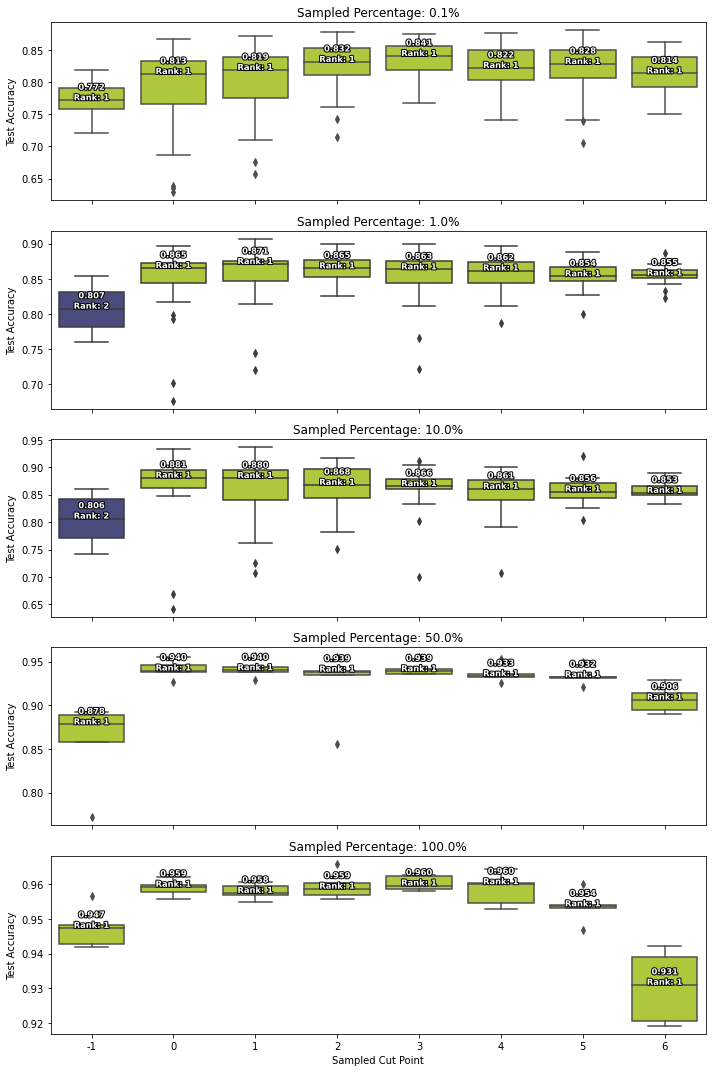

In [41]:
# run statistical tests below to get the df_rankings
_, df_rankings = pairwise_comparison(df=df_other)
ranks_sorted = box_plot(df=df_other, rank_df=df_rankings, params=params, add_baseline=False)

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/s

Freeze = True, Reinitialize = False, Pooling = True, Learning rate = 0.001


<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

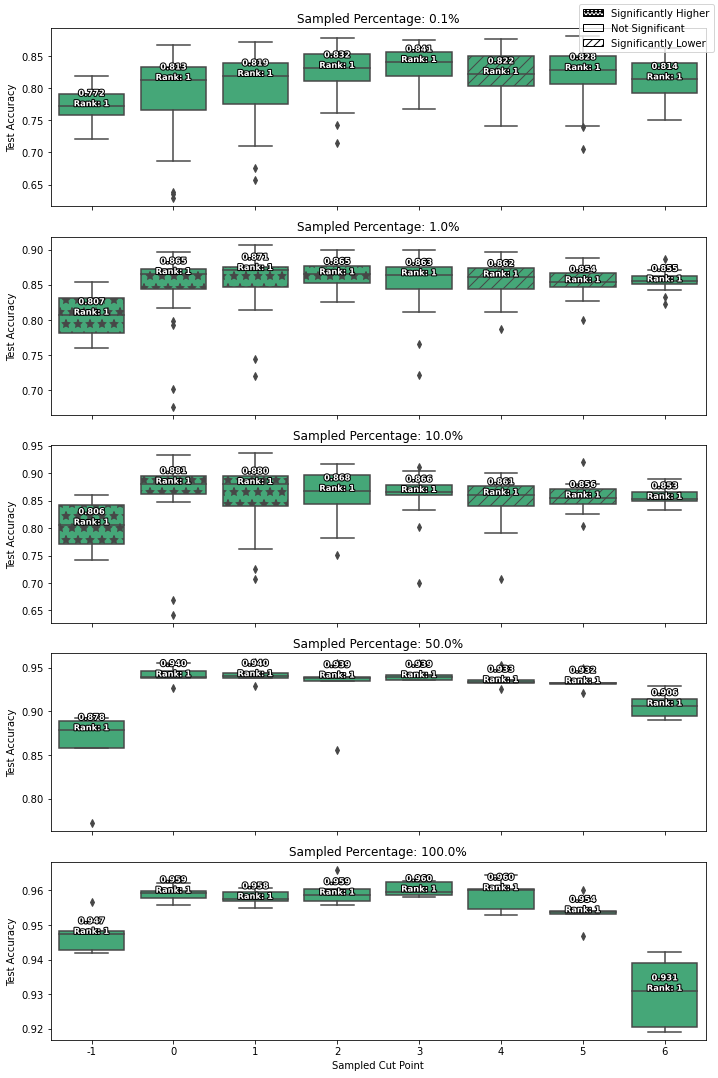

In [30]:
# run statistical tests below to get the df_rankings
_, df_rankings = pairwise_comparison(df=df_other)
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_other = df_other.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_other = stats_other.reset_index()
stats_other.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > df_rankings_other.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_other.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['rank'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_other['rank'] = df_rankings_other['Mean Test Accuracy'].astype(int)
box_plot(df=df_other, rank_df=df_rankings, params=params, pairwise_rank_df=df_rankings_other, pairwise=True)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

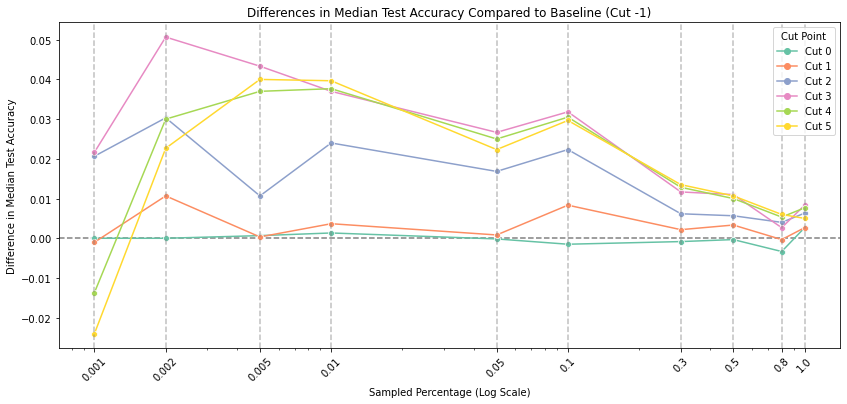

In [7]:
compare_to_baseline_line_plot(df)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

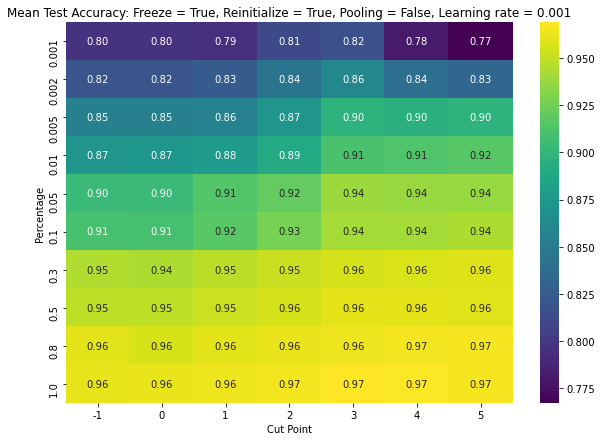

In [13]:
heatmap(df, params, figsize=(10,7))

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

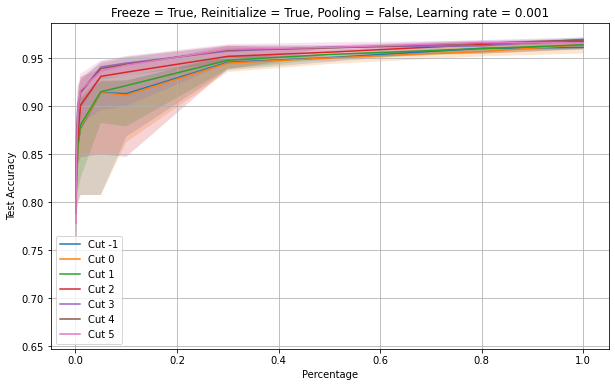

In [15]:
line_pilot_with_ranges(df, params)

### ARI Box Plots

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

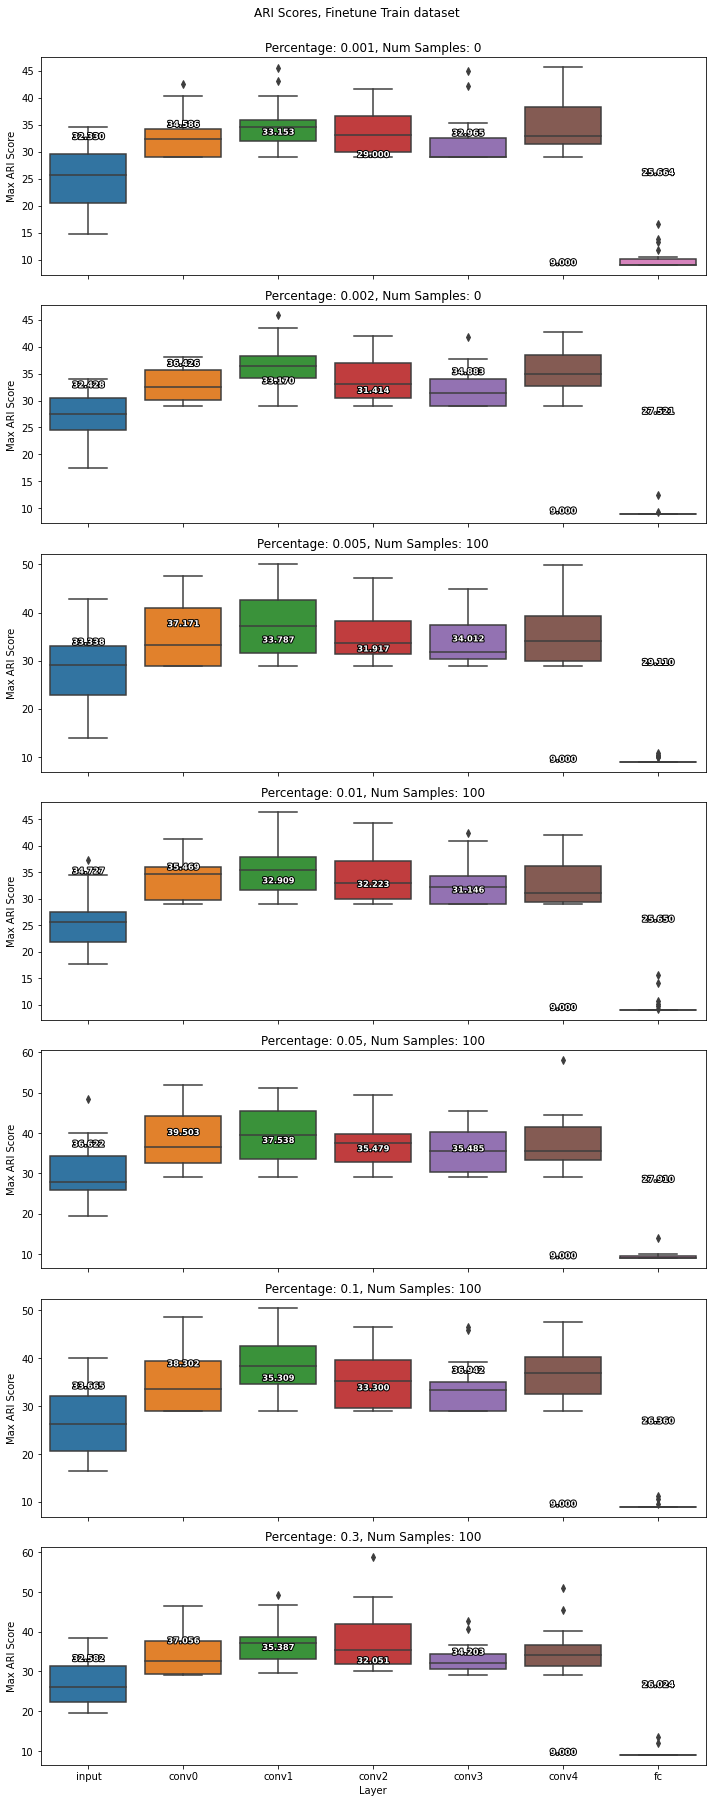

In [16]:
layer_names = ["input", 'conv0', 'conv1', 'conv2', 'conv3', 'conv4', 'fc']
plot_ARI_scores_percentages(df_ari, dataset="Finetune", split="Train", order=layer_names, figsize=(10,25))

# 2. Statistical Tests

### Pairwise Comparison between two plots

In [63]:
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_empirical_random)

/home/arnisa/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [64]:
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_truncate = df_truncate.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_truncate = stats_truncate.reset_index()
stats_truncate.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

In [65]:
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_truncate = stats_truncate.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > df_rankings_truncate.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_truncate.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_truncate.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_truncate.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['rank'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_truncate['rank'] = df_rankings_truncate['Mean Test Accuracy'].astype(int)

{8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8}


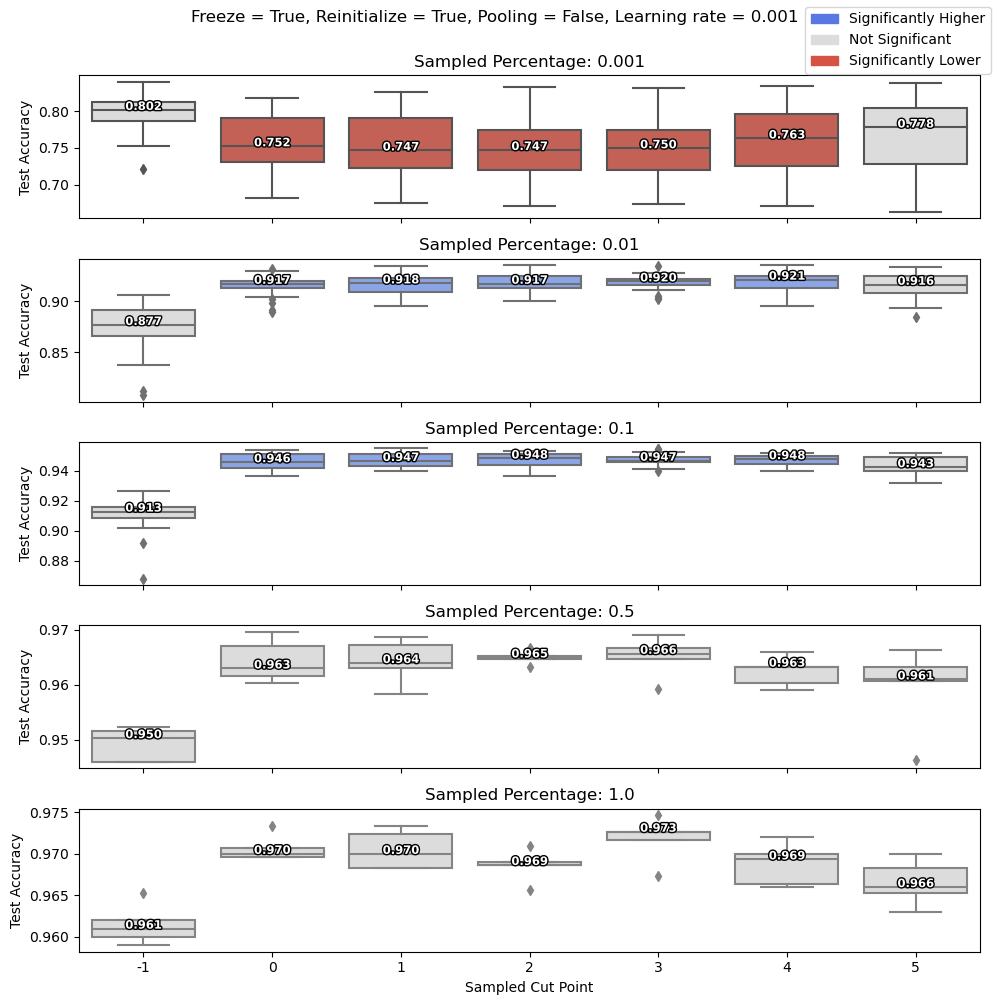

In [67]:
ranks_sorted = box_plot_percentages_experiments(df=df_empirical, rank_df=df_rankings_empirical, unique_ranks=np.array([1,5,8]), pairwise=True, color_palette="coolwarm", add_baseline=False, color_ranks=True, params=params)

{8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8}


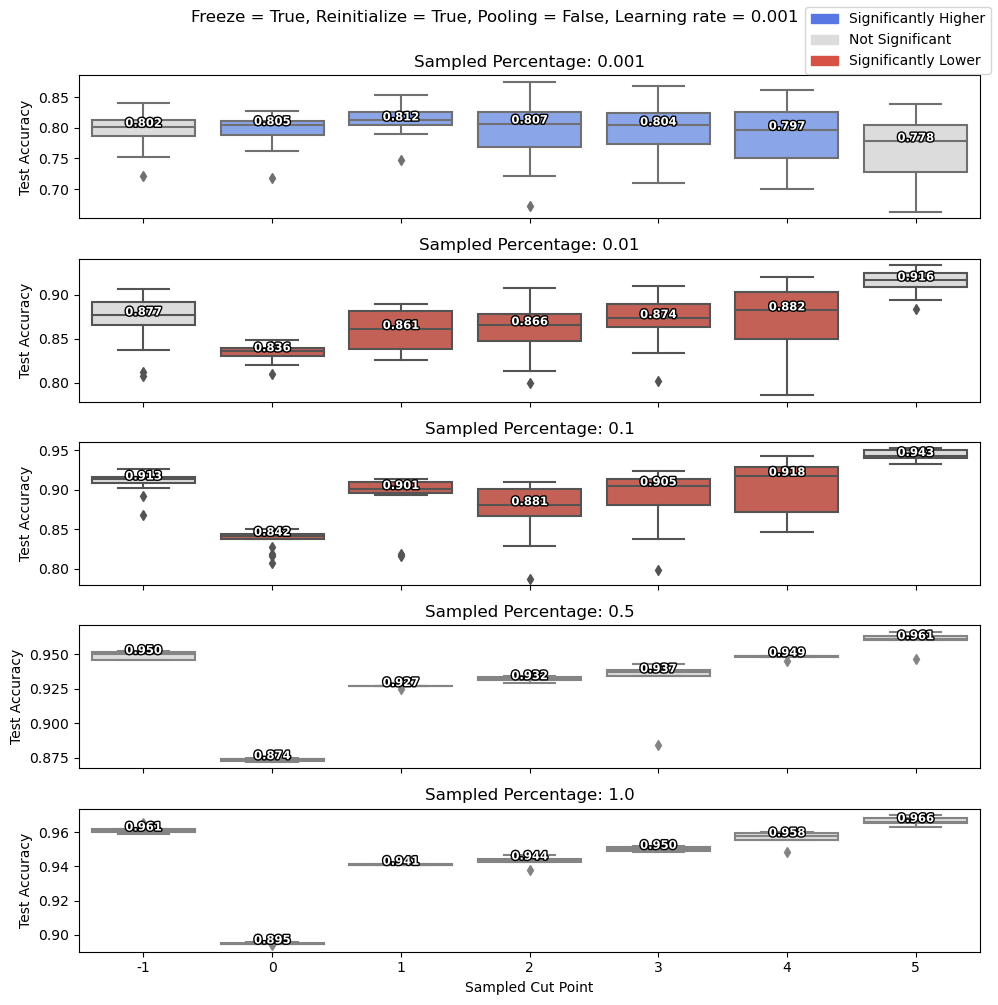

In [69]:
ranks_sorted = box_plot_percentages_experiments(df=df_truncate, rank_df=df_rankings_truncate, pairwise=True, unique_ranks=np.array([1,5,8]),  color_palette="coolwarm", add_baseline=False, color_ranks=True, params=params)

### Tables for Ranking Cuts

In [22]:
df_wilcoxon_pairwise, _ = pairwise_comparison(df=df)

df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False)
# print(latex_table)
# TODO: next, \text{p-value if significant}
# iterate over both the rows in the latex table string and the df_wilcoxon_pairwise
# if the row is significant, add the p-value to the latex table string
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        # split row with respect to " & ", take the 5th value, encapsulate it in \textbf{} and join them back
        row = row.split(" & ")
        
        # row[4] = "\colorbox[HTML]{B2EAB1}{\\textbf{" + row[4].strip("\\") + "}}"
        # print(row)
        row = " & ".join(row[:-1])
        row = "\\rowcolor{green!20}\n" + row
    else:
        row = row.split(" & ")
        row = " & ".join(row[:-1])
    rows[i] = row + " \\\\"

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(header + rows + footer)

/home/arnisa/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [23]:
print(latex_table)

\begin{tabular}{rrrrrr}
\toprule
Percentage & Cut Point 1 & Cut Point 2 & statistic & p_value & is_significant \\
\midrule
\rowcolor{green!20}
0.001000 & 0 & 1 & 48 & 0.001296 \\
0.001000 & 0 & 2 & 155 & 0.853200 \\
0.001000 & 0 & 3 & 159 & 0.936803 \\
\rowcolor{green!20}
0.001000 & 1 & 2 & 62 & 0.005579 \\
\rowcolor{green!20}
0.001000 & 1 & 3 & 79 & 0.025505 \\
0.001000 & 2 & 3 & 155 & 0.853200 \\
0.010000 & 0 & 1 & 123 & 0.299612 \\
\rowcolor{green!20}
0.010000 & 0 & 2 & 71 & 0.012466 \\
\rowcolor{green!20}
0.010000 & 0 & 3 & 43 & 0.000715 \\
\rowcolor{green!20}
0.010000 & 1 & 2 & 75 & 0.017312 \\
\rowcolor{green!20}
0.010000 & 1 & 3 & 23 & 0.000038 \\
\rowcolor{green!20}
0.010000 & 2 & 3 & 1 & 0.000000 \\
0.100000 & 0 & 1 & 76 & 0.679037 \\
0.100000 & 0 & 2 & 90 & 0.621513 \\
\rowcolor{green!20}
0.100000 & 0 & 3 & 12 & 0.000835 \\
0.100000 & 1 & 2 & 95 & 0.728506 \\
\rowcolor{green!20}
0.100000 & 1 & 3 & 43 & 0.019234 \\
\rowcolor{green!20}
0.100000 & 2 & 3 & 7 & 0.000036 \\
0.50000

# 3. Extras
Don't forget to change the flags to the correct ones for the titles in the params!

### Extra 1: Split the dictionaries into baseline and fine-tuning one
only run when necessary

In [14]:
with open('results/results_freeze_True_reinit_True_pool_False_random_classes.json', 'r') as f:
    data_dicts = json.load(f)

params = data_dicts[0]
baselines = [params]
results = [params]
for row in data_dicts[1:]:
    if row["sampled_cut_point"] == -1:
        baselines.append(row)
    else:
        results.append(row)

with open(f'results/baselines_freeze_True_reinit_True_pool_False_truncate_False_3_layers_random_classes.json', 'w') as f:
    json.dump(baselines, f)
with open(f'results/results_freeze_True_reinit_True_pool_False_truncate_False_3_layers_random_classes.json', 'w') as f:
    json.dump(results, f)